# Bayesian Belief Networks (BBNs) and Causal Discovery

### Introduction to Bayesian Belief Networks (BBNs)
A Bayesian Belief Network (BBN) is a probabilistic graphical model that represents a set of variables and their conditional dependencies using a Directed Acyclic Graph (DAG). Each node in the graph represents a variable, while the edges represent probabilistic dependencies among them.

BBNs provide a structured way to model uncertainty and infer causality in complex systems, making them widely used in domains such as healthcare, fraud detection, social sciences, and risk assessment.

### How BBNs Help in Causal Discovery

Causal discovery aims to identify cause-and-effect relationships from data. Traditional statistical methods focus on correlations, whereas BBNs go further by modeling causal dependencies explicitly.

### Advantages of Using BBNs for Causal Discovery:
* **Capturing Conditional Dependencies:** BBNs define how variables influence each other using conditional probability distributions (CPDs).
* **Graphical Representation of Causal Relationships:** They help visualize causal links through a DAG.
* **Inference under Uncertainty:** BBNs can estimate missing data and predict outcomes based on given evidence.
* **Scenario Analysis:** They allow "what-if" analyses by altering evidence to observe changes in outcomes.

### Process to Define a Bayesian Belief Network (BBN)

To build a BBN, follow these key steps:

##### 1. Step 1: Define Variables and Relationships

List the key variables and hypothesize potential causal relationships.

For example, in a dataset containing:
* Race
* Gender
* Age
* Weight
* Height
* Frisked (Yes/No)

A plausible causal structure might be:

* Race → Frisked (Assumption: Race may influence likelihood of being frisked.)

* Gender → Frisked (Gender may affect frisking probability.)

* Age → Frisked (Younger or older people might be frisked at different rates.)

* Weight, Height → Frisked (Physical attributes may be associated with suspicion levels.)

* Race → Socioeconomic Factors (hidden variables) (Unobserved factors affecting interactions.)

##### Step 2: Structure Learning (Identifying the DAG)

Structure learning involves determining the network topology, which can be done in two ways:

1. Expert Knowledge: Domain experts define the structure based on prior understanding.

2. Data-Driven Approaches: Use algorithms to learn the structure from data.
  * Constraint-Based Methods (e.g., PC Algorithm)
  * Score-Based Methods (e.g., Hill-Climbing, Bayesian Information Criterion (BIC))
  * Hybrid Methods (combination of both)

##### Step 3: Parameter Learning (Learning CPDs)

Once the structure is defined, parameter learning involves estimating the Conditional Probability Distributions (CPDs) for each node given its parent nodes.

### Conditional Probability Inference Using Evidence

Inference allows us to predict the probability of an event given observed evidence. For example:

* What is the probability of being frisked given the person is Black and Male?

* How does age affect frisking probability?







In [3]:
# !pip install bnlearn
# !pip install numpy==1.26.4
# !pip install pgmpy==0.1.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.0 MB/s eta 0:00:00
   ━━

In [1]:
import numpy as np
import pandas as pd
import pgmpy
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"PgmPy version: {pgmpy.__version__}")

NumPy version: 1.26.4
Pandas version: 2.2.2
PgmPy version: 0.1.20


In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
years = [2017,2018,2019,2020,2021,2022,2023]

files=['sqf-2017.xlsx',
 'sqf-2018.xlsx',
 'sqf-2019.xlsx',
 'sqf-2020.xlsx',
 'sqf-2021.xlsx',
 'sqf-2022.xlsx',
 'sqf-2023.xlsx',
 ]

df = pd.read_excel('./sqf-2024.xlsx')
for file,year in zip(files,years):
    df_year = pd.read_excel(file)
    df_year['year'] = year
    cols = [col for col in df.columns if col in df_year.columns]
    print(f"{year} : {df_year.shape}")
    df = pd.concat([df,df_year[cols]])

2017 : (11629, 84)
2018 : (11008, 84)
2019 : (13459, 84)
2020 : (9544, 84)
2021 : (8947, 84)
2022 : (15102, 83)
2023 : (16971, 83)


In [4]:
RACE = 'SUSPECT_RACE_DESCRIPTION'
target = 'FRISKED_FLAG'

df_filter = df[~df.SUSPECT_RACE_DESCRIPTION.isin(['(null)','MALE'])]
print(df_filter.shape,df.shape)

df_filter['SUSPECT_RACE_DESCRIPTION'] = np.where(df_filter['SUSPECT_RACE_DESCRIPTION']=='ASIAN/PAC.ISL','ASIAN / PACIFIC ISLANDER',df_filter['SUSPECT_RACE_DESCRIPTION'])
df_filter['SUSPECT_RACE_DESCRIPTION'] = np.where(df_filter['SUSPECT_RACE_DESCRIPTION']=='MIDDLE EASTERN/SOUTHWEST','MIDDLE EASTERN/SOUTHWEST ASIAN',df_filter['SUSPECT_RACE_DESCRIPTION'])
df_filter['SUSPECT_RACE_DESCRIPTION'] = np.where(df_filter['SUSPECT_RACE_DESCRIPTION']=='AMERICAN INDIAN/ALASKAN N','AMERICAN INDIAN/ALASKAN NATIVE',df_filter['SUSPECT_RACE_DESCRIPTION'])
df_filter['SUSPECT_RACE_DESCRIPTION'] = np.where(df_filter['SUSPECT_RACE_DESCRIPTION']=='AMER IND','AMERICAN INDIAN/ALASKAN NATIVE',df_filter['SUSPECT_RACE_DESCRIPTION'])

feats=['BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG',
       'SUSPECTED_CRIME_DESCRIPTION',
       'SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG','STOP_LOCATION_X','STOP_LOCATION_Y',
       'STOP_WAS_INITIATED','STOP_DURATION_MINUTES','STOP_FRISK_TIME','SUSPECT_REPORTED_AGE',
       'SUSPECT_HEIGHT','SUSPECT_WEIGHT','SUSPECT_SEX',
       'SUSPECT_RACE_DESCRIPTION','SEARCHED_FLAG','SEARCH_BASIS_HARD_OBJECT_FLAG',
       'CONSENT_GIVEN_FLG','FRISKED_FLAG']

df_filter = df_filter[df_filter.STOP_WAS_INITIATED!='(null)']
df_filter['BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG'] = np.where(df_filter.BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG=='(null)',0,1)
df_filter['SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG'] = np.where(df_filter.SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG=='(null)',0,1)
df_filter['SUSPECT_SEX'] = np.where(df_filter.SUSPECT_SEX=='(null)','UNKNOWN',df_filter.SUSPECT_SEX)
df_filter['SEARCHED_FLAG'] = np.where(df_filter.SEARCHED_FLAG=='Y',1,0)
df_filter['SEARCH_BASIS_HARD_OBJECT_FLAG'] = np.where(df_filter.SEARCH_BASIS_HARD_OBJECT_FLAG=='(null)',0,1)

df_filter['CONSENT_GIVEN_FLG'] = np.where(df_filter.CONSENT_GIVEN_FLG.isin(['(null)','(']),'U',df_filter.CONSENT_GIVEN_FLG)
df_filter['FRISKED_FLAG'] = np.where(df_filter.FRISKED_FLAG=='Y',1,0)

df_filter['SUSPECT_HEIGHT'] = np.where(df_filter.SUSPECT_HEIGHT.isin(['(null)',' ']),None,df_filter.SUSPECT_HEIGHT)
df_filter['SUSPECT_HEIGHT'] = df_filter.SUSPECT_HEIGHT.astype(float)
df_filter['SUSPECT_HEIGHT'] = df_filter.SUSPECT_HEIGHT.fillna(df_filter.SUSPECT_HEIGHT.mean())

df_filter['SUSPECT_WEIGHT'] = np.where(df_filter.SUSPECT_WEIGHT.isin(['(null)',' ']),None,df_filter.SUSPECT_WEIGHT)
df_filter['SUSPECT_WEIGHT'] = df_filter.SUSPECT_WEIGHT.astype(float)
df_filter['SUSPECT_WEIGHT'] = df_filter.SUSPECT_WEIGHT.fillna(df_filter.SUSPECT_WEIGHT.mean())

df_filter['SUSPECT_REPORTED_AGE'] = np.where(df_filter.SUSPECT_REPORTED_AGE.isin(['(null)',' ']),None,df_filter.SUSPECT_REPORTED_AGE)
df_filter['SUSPECT_REPORTED_AGE'] = df_filter.SUSPECT_REPORTED_AGE.astype(float)
df_filter['SUSPECT_REPORTED_AGE'] = df_filter.SUSPECT_REPORTED_AGE.fillna(df_filter.SUSPECT_REPORTED_AGE.mean())

req_feats=['BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG',
       'SUSPECTED_CRIME_DESCRIPTION',
       'SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG',
       'STOP_WAS_INITIATED','STOP_DURATION_MINUTES','STOP_FRISK_TIME','SUSPECT_REPORTED_AGE',
       'SUSPECT_HEIGHT','SUSPECT_WEIGHT','SUSPECT_SEX',
       'SUSPECT_RACE_DESCRIPTION','SEARCHED_FLAG','SEARCH_BASIS_HARD_OBJECT_FLAG',
       'CONSENT_GIVEN_FLG','FRISKED_FLAG']
cat_feats = ['STOP_WAS_INITIATED','SUSPECT_SEX',
             'CONSENT_GIVEN_FLG','SUSPECTED_CRIME_DESCRIPTION']

df_filter = df_filter[req_feats]


(109807, 81) (112046, 81)


In [ ]:
#df_filter.groupby(['SUSPECT_RACE_DESCRIPTION','SUSPECT_SEX'])['SUSPECT_SEX'].count()

In [5]:
def round_col_range(df,col):
    df[col] = df[col].apply(lambda x : str(round(float(x.split(' - ')[0])))+' - '+str(round(float(x.split(' - ')[1]))))
    return df

def data_discretization_2(df,num_feats):
    for feat in num_feats:
        labels = ['A','B','C','D','E']
        df[feat+'_range'] = pd.qcut(df[feat],q=[0,0.10,0.25,0.75,0.9,1]).astype(str).str.replace('(','').str.replace(']','').str.replace(',',' - ')
        if '%' not in feat and feat != 'Occupancy':
            df = round_col_range(df.copy(),feat+"_range")
        df[feat] = pd.qcut(df[feat],q=[0,0.10,0.25,0.75,0.9,1],labels=labels)
    return df


In [23]:
bbn_df = df_filter[['SUSPECT_SEX',
                    'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG',
                    'FRISKED_FLAG',
                    'SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG',
                    'SUSPECT_RACE_DESCRIPTION',
                    'SUSPECT_REPORTED_AGE',
                    'SUSPECT_HEIGHT',
                    'SUSPECT_WEIGHT',
                    'SEARCHED_FLAG',
                    'SEARCH_BASIS_HARD_OBJECT_FLAG',
                    'CONSENT_GIVEN_FLG'
                    ]]
num_feats = ['SUSPECT_REPORTED_AGE',
                    'SUSPECT_HEIGHT',
                    'SUSPECT_WEIGHT']
age_cat = {'0-16':'CHILD',
           '16-20':'TEENAGER',
           '20-34':'YOUNG',
           '34-45':'MIDDLE AGE',
           '45-120':'SENIOR ADULT'}
bbn_df = data_discretization_2(bbn_df.copy(),num_feats)
bbn_df = bbn_df.drop(columns=num_feats)
#bbn_df['SUSPECT_REPORTED_AGE'] = bbn_df['SUSPECT_REPORTED_AGE_range'].map(age_cat)
bbn_df = bbn_df.rename(columns={'SUSPECT_SEX':'GENDER',
                                'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG':'CRIME_FLAG',
                                'SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG':'WEAPON_FLAG',
                                'SUSPECT_RACE_DESCRIPTION':'RACE',
                                'SUSPECT_REPORTED_AGE_range':'AGE',
                                'SUSPECT_HEIGHT_range':'HEIGHT',
                                'SUSPECT_WEIGHT_range':'WEIGHT'})
bbn_df = bbn_df[['AGE','GENDER',
                 'WEIGHT','HEIGHT',
                 'RACE','FRISKED_FLAG',
                 # 'SEARCHED_FLAG',
                  #'SEARCH_BASIS_HARD_OBJECT_FLAG',
                 # 'CONSENT_GIVEN_FLG'
                  ]]

In [24]:
bbn_df

,AGE,GENDER,WEIGHT,HEIGHT,RACE,FRISKED_FLAG
0,20 - 34,MALE,150 - 180,5 - 5,WHITE HISPANIC,1
1,20 - 34,MALE,180 - 200,6 - 6,BLACK,1
2,16 - 20,MALE,130 - 150,6 - 6,WHITE HISPANIC,1
3,0 - 16,MALE,0 - 130,0 - 5,WHITE HISPANIC,1
4,0 - 16,MALE,0 - 130,0 - 5,WHITE HISPANIC,1
...,...,...,...,...,...,...
16966,20 - 34,MALE,150 - 180,5 - 6,WHITE HISPANIC,1
16967,20 - 34,MALE,130 - 150,5 - 6,WHITE,1
16968,20 - 34,MALE,150 - 180,6 - 60,WHITE,1
16969,34 - 45,MALE,150 - 180,5 - 6,ASIAN / PACIFIC ISLANDER,1


In [27]:
black_list = [('FRISKED_FLAG','RACE'),
              ('FRISKED_FLAG','CRIME_FLAG'),
              ('FRISKED_FLAG','WEAPON_FLAG'),
              ('FRISKED_FLAG','CRIME_FLAG'),
              ('FRISKED_FLAG','GENDER'),
              ('FRISKED_FLAG','AGE'),
              ('RACE','FRISKED_FLAG')]
fixed_edge = [('RACE','GENDER'),
              ('RACE','AGE')
              ]

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


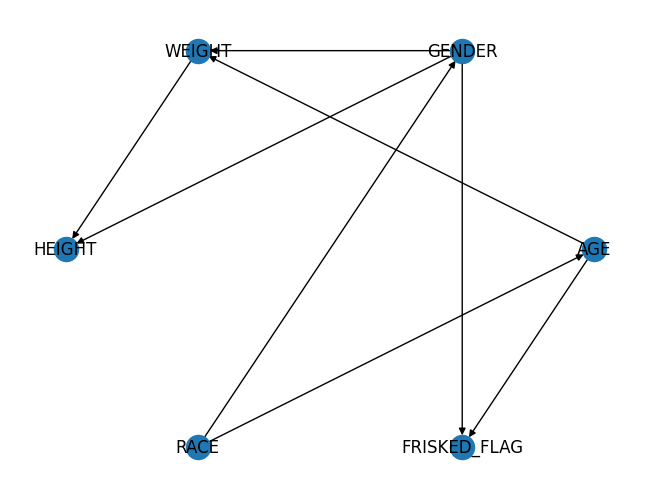

In [28]:
import bnlearn as bn
from pgmpy.inference import VariableElimination
import networkx


"""
The Hill Climb Search (HCS) Algorithm is a score-based optimization technique
used in Bayesian Network Structure Learning. It aims to find the best-directed
acyclic graph (DAG) that represents the underlying relationships between variables
in a dataset.
"""
def build_bbn(df,black_list=None,white_list=None,fixed_edges={},draw=True):
    est = bn.pgmpy.estimators.HillClimbSearch(df)
    best_model = est.estimate(scoring_method=bn.pgmpy.estimators.BicScore(df),
                             black_list = black_list,
                             white_list=white_list,
                             fixed_edges = fixed_edges,show_progress=False)

    if draw:
        networkx.draw_circular(best_model,with_labels=True)

    pg_model = bn.pgmpy.models.BayesianNetwork(list(best_model.edges()))
    pg_model.fit(df)

    bn_model = bn.structure_learning.fit(df)

    #abn_cpd = bn.pgmpy.estimators.MaximumLikelihoodEstimator(pg_model,bbn).estimate_cpd('planned_shrinkage%')
    #cpds = pg_model.get_cpds()

    return pg_model,bn_model


pg_model,bn_model = build_bbn(bbn_df.copy(),black_list=black_list,fixed_edges=fixed_edge)

There is indirect relationship of RACE with FRISKED.
1. RACE -----------------> GENDER -----------------> FRISKED
2. RACE -----------------> AGE -----------------> FRISKED

In [32]:
def cpd_DataFrame(cpd,df):
    varaiable_names = cpd.variables
    cardinality = cpd.cardinality
    tot_cols = np.prod(cpd.cardinality[1:])
    variables = sorted([var for var in df[varaiable_names[0]].unique() if str(var).lower()!='nan'])
    df_index = [var for var in varaiable_names[1:]]+[varaiable_names[0] + ' ('+str(index)+')' for index in variables]
    rows=[]
    for var,card in zip(varaiable_names[1:],cardinality[1:]):
        row =  [var + ' ('+str(index)+')' for index in sorted(df[var].unique())]
        rows.append(row)
    combinations = list(itertools.product(*rows))
    for i in range(len(varaiable_names[1:])):
        rows[i] = [row[i] for row in combinations]
        #print(row[i])
    res_df1 = pd.DataFrame(rows)
    res_df2 = pd.DataFrame()
    for i in range(cardinality[0]):
        res_df2 = pd.concat([res_df2,pd.DataFrame(data=cpd.values[i].reshape(1,-1))])
    res_df = pd.concat([res_df1,res_df2])
    res_df.index = df_index
    #print(res_df)
    return res_df.T.copy()

In [54]:
from pgmpy.inference import VariableElimination
import itertools

inference = VariableElimination(pg_model)

inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'GENDER':'MALE','RACE':'BLACK'},show_progress=False),bbn_df)

In [55]:
print("Proability of FRISKED if GENDER=MALE and RACE=BLACK P(FRISKED|GENDER=MALE,RACE=BLACK)")
inf_res

Proability of FRISKED if GENDER=MALE and RACE=BLACK P(FRISKED|GENDER=MALE,RACE=BLACK)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.3779,0.6221


In [56]:
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'GENDER':'MALE','RACE':'WHITE'},show_progress=False),bbn_df)
print("Proability of FRISKED if GENDER=MALE and RACE=WHITE P(FRISKED|GENDER=MALE,RACE=WHTTE)")
inf_res

Proability of FRISKED if GENDER=MALE and RACE=WHITE P(FRISKED|GENDER=MALE,RACE=WHTTE)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.40478,0.59522


In [52]:
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'GENDER':'FEMALE','RACE':'BLACK'},show_progress=False),bbn_df)
print("Proability of FRISKED if GENDER=FEMALE and RACE=BLACK P(FRISKED|GENDER=FEMALE,RACE=BLACK)")
inf_res

Proability of FRISKED if GENDER=FEMALE and RACE=BLACK P(FRISKED|GENDER=FEMALE,RACE=BLACK)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.683539,0.316461


In [53]:
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'GENDER':'FEMALE','RACE':'WHITE'},show_progress=False),bbn_df)
print("Proability of FRISKED if GENDER=FEMALE and RACE=WHITE P(FRISKED|GENDER=FEMALE,RACE=WHITE)")
inf_res

Proability of FRISKED if GENDER=FEMALE and RACE=WHITE P(FRISKED|GENDER=FEMALE,RACE=WHITE)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.695745,0.304255


In [60]:
AGE = '0 - 16'
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'AGE':AGE,'RACE':'BLACK'},show_progress=False),bbn_df)
print(f"Proability of FRISKED if AGE={AGE} and RACE=BLACK P(FRISKED|AGE={AGE},RACE=BLACK)")
inf_res

Proability of FRISKED if AGE=0 - 16 and RACE=BLACK P(FRISKED|AGE=0 - 16,RACE=BLACK)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.425116,0.574884


In [66]:
AGE = '0 - 16'
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'AGE':AGE,'RACE':'WHITE'},show_progress=False),bbn_df)
print(f"Proability of FRISKED if AGE={AGE} and RACE=WHITE P(FRISKED|AGE={AGE},RACE=WHITE)")
inf_res

Proability of FRISKED if AGE=0 - 16 and RACE=WHITE P(FRISKED|AGE=0 - 16,RACE=WHITE)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.445345,0.554655


In [62]:
AGE = '16 - 20'
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'AGE':AGE,'RACE':'BLACK'},show_progress=False),bbn_df)
print(f"Proability of FRISKED if AGE={AGE} and RACE=BLACK P(FRISKED|AGE={AGE},RACE=BLACK)")
inf_res

Proability of FRISKED if AGE=16 - 20 and RACE=BLACK P(FRISKED|AGE=16 - 20,RACE=BLACK)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.323016,0.676984


In [67]:
AGE = '16 - 20'
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'AGE':AGE,'RACE':'WHITE'},show_progress=False),bbn_df)
print(f"Proability of FRISKED if AGE={AGE} and RACE=WHITE P(FRISKED|AGE={AGE},RACE=WHITE)")
inf_res

Proability of FRISKED if AGE=16 - 20 and RACE=WHITE P(FRISKED|AGE=16 - 20,RACE=WHITE)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.343564,0.656436


In [63]:
AGE = '20 - 34'
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'AGE':AGE,'RACE':'BLACK'},show_progress=False),bbn_df)
print(f"Proability of FRISKED if AGE={AGE} and RACE=BLACK P(FRISKED|AGE={AGE},RACE=BLACK)")
inf_res

Proability of FRISKED if AGE=20 - 34 and RACE=BLACK P(FRISKED|AGE=20 - 34,RACE=BLACK)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.370668,0.629332


In [68]:
AGE = '20 - 34'
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'AGE':AGE,'RACE':'WHITE'},show_progress=False),bbn_df)
print(f"Proability of FRISKED if AGE={AGE} and RACE=WHITE P(FRISKED|AGE={AGE},RACE=WHITE)")
inf_res

Proability of FRISKED if AGE=20 - 34 and RACE=WHITE P(FRISKED|AGE=20 - 34,RACE=WHITE)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.388497,0.611503


In [64]:
AGE = '34 - 45'
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'AGE':AGE,'RACE':'BLACK'},show_progress=False),bbn_df)
print(f"Proability of FRISKED if AGE={AGE} and RACE=BLACK P(FRISKED|AGE={AGE},RACE=BLACK)")
inf_res

Proability of FRISKED if AGE=34 - 45 and RACE=BLACK P(FRISKED|AGE=34 - 45,RACE=BLACK)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.476582,0.523418


In [69]:
AGE = '34 - 45'
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'AGE':AGE,'RACE':'WHITE'},show_progress=False),bbn_df)
print(f"Proability of FRISKED if AGE={AGE} and RACE=WHITE P(FRISKED|AGE={AGE},RACE=WHITE)")
inf_res

Proability of FRISKED if AGE=34 - 45 and RACE=WHITE P(FRISKED|AGE=34 - 45,RACE=WHITE)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.492961,0.507039


In [65]:
AGE = '45 - 120'
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'AGE':AGE,'RACE':'BLACK'},show_progress=False),bbn_df)
print(f"Proability of FRISKED if AGE={AGE} and RACE=BLACK P(FRISKED|AGE={AGE},RACE=BLACK)")
inf_res

Proability of FRISKED if AGE=45 - 120 and RACE=BLACK P(FRISKED|AGE=45 - 120,RACE=BLACK)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.567992,0.432008


In [70]:
AGE = '45 - 120'
inf_res = cpd_DataFrame(inference.query(['FRISKED_FLAG'],evidence={'AGE':AGE,'RACE':'WHITE'},show_progress=False),bbn_df)
print(f"Proability of FRISKED if AGE={AGE} and RACE=WHITE P(FRISKED|AGE={AGE},RACE=WHITE)")
inf_res

Proability of FRISKED if AGE=45 - 120 and RACE=WHITE P(FRISKED|AGE=45 - 120,RACE=WHITE)


,FRISKED_FLAG (0),FRISKED_FLAG (1)
0,0.580317,0.419683


### Conclusion

Bayesian Belief Networks (BBNs) provide a powerful framework for causal discovery and probabilistic reasoning. By applying BBNs to datasets with variables like race, gender, age, weight, height, and frisked status, we found that there is potential bias in RACIAL group.